In [7]:
import tensorflow as tf
import zipfile
import os
import pathlib

# Download the dataset ZIP
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url)

# Extract it manually
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Define the paths to train and validation folders
data_dir = pathlib.Path('/content/cats_and_dogs_filtered')
train_dir = data_dir / 'train'
validation_dir = data_dir / 'validation'


In [8]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
num_classes = 2

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5157 - loss: 0.9158 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5526 - loss: 0.6863 - val_accuracy: 0.6240 - val_loss: 0.6698
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6052 - loss: 0.6533 - val_accuracy: 0.6810 - val_loss: 0.6250
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6883 - loss: 0.6046 - val_accuracy: 0.6830 - val_loss: 0.6118
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.7437 - loss: 0.5412 - val_accuracy: 0.7100 - val_loss: 0.6062


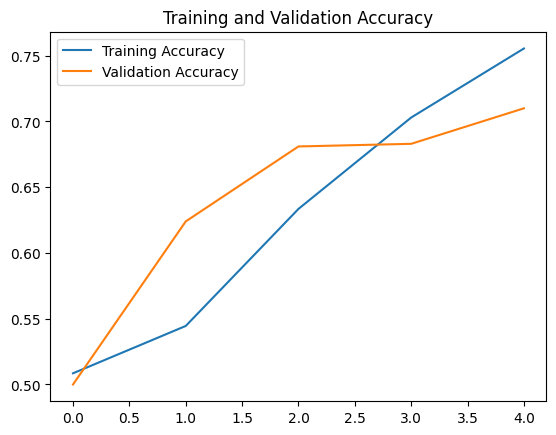

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
